<div class="alert alert-block alert-success"> 
 Generic Example
</div>

Load the libraries being used in the demo including the dill libray to pickle the data handler once they were loaded.

In [1]:
import dill as pickle
from cosinorage.datahandlers import GenericDataHandler, plot_enmo
from cosinorage.features import WearableFeatures, dashboard, BulkWearableFeatures
from cosinorage.bioages import CosinorAge

%load_ext autoreload
%autoreload 2

Binary flag indicating if the data handler should be reloaded from the data files (True) or just loaded from the pickle file (False). When running the demo multiple times, it is recommended to set this to False to avoid reloading the data handler from the data files - however, please note that when running the notebook for the first time, it is important to set this to True to ensure that the data handler is loaded from the data files.

In [2]:
reload = True

Determine the preprocess arguments for the GalaxyDataHandler. The arguments are used for the autocalibration procedure, the frequency filtering and the wear detection algorithm.

In [3]:
preprocess_args = {
    'autocalib_sd_criter': 0.001,
    'autocalib_sphere_crit': 0.08,
    'filter_type': 'lowpass',
    'filter_cutoff': 2,
    'wear_sd_crit': 0.00013,
    'wear_range_crit': 0.067,
    'wear_window_length': 45,
    'wear_window_skip': 7,
    'required_daily_coverage': 0.25
}

Load the data from patient into the GenericDataHandler object from the data files which are located at the specified file directory.

In [4]:
file_path = '/Users/jacquesleooscar/CO-001.csv'
#file_path = '../data/public data/processed/motion/9618981_acceleration.csv'

if reload:
    generic_handler = GenericDataHandler(file_path=file_path, 
                                            data_format='csv',
                                            data_type='accelerometer-g',
                                            time_format='datetime',
                                            time_column='timestamp',
                                            time_zone=None,
                                            data_columns=['x', 'y', 'z'],
                                            preprocess_args=preprocess_args,
                                            verbose=True
                                            )

    with open("pickle/generic_handler.pkl", "wb") as file:
        pickle.dump(generic_handler, file)
else:
    with open("pickle/generic_handler.pkl", "rb") as file:
        generic_handler = pickle.load(file)

Read csv file from /Users/jacquesleooscar/CO-001.csv
Loaded 2857 Count data records from /Users/jacquesleooscar/CO-001.csv
Filtered out 1417/2857 accelerometer-g records due to filtering out first and/or last day
Filtered out 0/1440 records due to incomplete daily coverage
Filtered out 0/1440 records due to filtering for longest consecutive sequence of days
Filtered to ensure first day starts at 00:00 and last day ends at 23:59: 0/1440 records removed
Resampled 1440 to 1440 timestamps
Calibration done
Noise removal failed, skipping noise removal
Wear detection done
Wear time calculated
Calculated ENMO for 1440 accelerometer records
Preprocessed accelerometer-g data
__load_data executed in 0.02 seconds


/Users/jacquesleooscar/Documents/Education/ETHZ/Curriculum/Semester04/04MasterThesis/CosinorAge/venvCL/lib/python3.10/site-packages/skdh/preprocessing/calibrate.py:163: UserWarning: Less than 72 hours of data (24.0 hours). No Calibration performed
  warn(


Printing out the metadata which was collected during data loading.

In [5]:
generic_handler.get_meta_data()

{'datasource': 'Generic',
 'data_format': 'CSV',
 'time_format': 'datetime',
 'raw_data_type': 'Accelerometer',
 'time_column': 'timestamp',
 'time_zone': None,
 'data_columns': ['x', 'y', 'z'],
 'raw_n_datapoints': 2857,
 'raw_start_datetime': Timestamp('2012-05-22 12:42:00'),
 'raw_end_datetime': Timestamp('2012-05-24 12:18:00'),
 'sf': np.float64(0.016666666666666666),
 'raw_data_frequency': '0.0167Hz',
 'raw_data_unit': 'g',
 'total_time': 86340.0,
 'wear_time': 0.0,
 'non-wear_time': 86340.0}

In [6]:
generic_handler.get_ml_data()

,x,y,z,x_raw,y_raw,z_raw,wear,enmo
timestamp,,,,,,,,
2012-05-23 00:00:00,-0.769867,0.614345,-0.193694,-0.769867,0.614345,-0.193694,0.0,3.809451
2012-05-23 00:01:00,-0.769414,0.614815,-0.193199,-0.769414,0.614815,-0.193199,0.0,3.653815
2012-05-23 00:02:00,-0.769164,0.615183,-0.192618,-0.769164,0.615183,-0.192618,0.0,3.575803
2012-05-23 00:03:00,-0.769960,0.616981,-0.182748,-0.769960,0.616981,-0.182748,0.0,3.444584
2012-05-23 00:04:00,-0.755368,0.632108,-0.188954,-0.755368,0.632108,-0.188954,0.0,2.918450
...,...,...,...,...,...,...,...,...
2012-05-23 23:55:00,-0.097077,0.049150,-0.991274,-0.097077,0.049150,-0.991274,0.0,0.000000
2012-05-23 23:56:00,-0.141477,0.181183,-0.977747,-0.141477,0.181183,-0.977747,0.0,4.406396
2012-05-23 23:57:00,-0.142172,0.102450,-0.988741,-0.142172,0.102450,-0.988741,0.0,4.150104


In [7]:
generic_handler.get_sf_data()

,x,y,z
timestamp,,,
2012-05-23 00:00:00,-0.769867,0.614345,-0.193694
2012-05-23 00:01:00,-0.769414,0.614815,-0.193199
2012-05-23 00:02:00,-0.769164,0.615183,-0.192618
2012-05-23 00:03:00,-0.769960,0.616981,-0.182748
2012-05-23 00:04:00,-0.755368,0.632108,-0.188954
...,...,...,...
2012-05-23 23:55:00,-0.097077,0.049150,-0.991274
2012-05-23 23:56:00,-0.141477,0.181183,-0.977747
2012-05-23 23:57:00,-0.142172,0.102450,-0.988741


Plotting the preprocessed ENMO data.

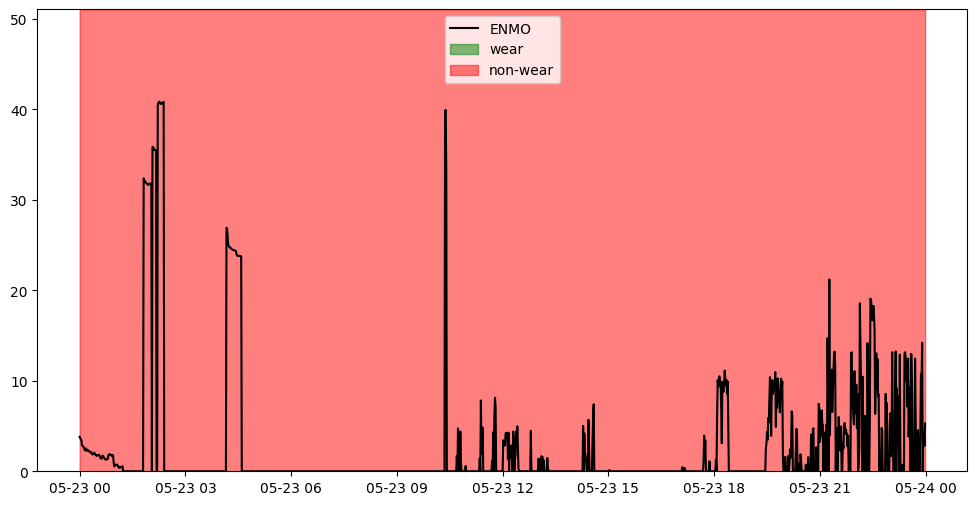

In [8]:
plot_enmo(generic_handler)

Setting hyperparameters for the sleep detection algorithm (sleep_ck_sf, sleep_rescore) and the cutpooint for the physical activity detection algorithm (pa_cutpoint_sl (cutpoint sedentary to light), pa_cutpoint_lm (cutpoint light to moderate), pa_cutpoint_mv (cutpoint moderate to vigorous)). sleep_ck_sf is a scale factor used in the sleep prediction algorithm - it needs to be adjusted depending on the data source and desired sensitivity of sleep detection.

In [9]:
features_args = {
    'sleep_ck_sf': 0.0025,
    'sleep_rescore': True,
    'pa_cutpoint_sl': 15,
    'pa_cutpoint_lm': 35,
    'pa_cutpoint_mv': 70,
}

In [10]:
handlers = [generic_handler]

bulk_features = BulkWearableFeatures(
    handlers=handlers, 
    features_args=features_args,
    cosinor_age_inputs=None, 
    compute_distributions=True
    )
bulk_features.get_summary_dataframe()

,feature,count,mean,std,min,max,median,q25,q75,iqr,mode,skewness
0,cosinor_mesor,1,2.579831,0.0,2.579831,2.579831,2.579831,2.579831,2.579831,0.0,2.579831,NaN
1,cosinor_amplitude,1,3.024463,0.0,3.024463,3.024463,3.024463,3.024463,3.024463,0.0,3.024463,NaN
2,cosinor_acrophase,1,-0.177561,0.0,-0.177561,-0.177561,-0.177561,-0.177561,-0.177561,0.0,-0.177561,NaN
3,cosinor_acrophase_time,1,40.693933,0.0,40.693933,40.693933,40.693933,40.693933,40.693933,0.0,40.693933,NaN
4,nonparam_IS,1,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,NaN
5,nonparam_IV,1,1.734038,0.0,1.734038,1.734038,1.734038,1.734038,1.734038,0.0,1.734038,NaN
6,nonparam_M10,1,3.265333,0.0,3.265333,3.265333,3.265333,3.265333,3.265333,0.0,3.265333,NaN
7,nonparam_L5,1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
8,nonparam_RA,1,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,NaN
9,physical_activity_sedentary,1,1369.000000,0.0,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,0.0,1369.000000,NaN


Compute a wide range of variable features and plot them in the dashboard below.

In [11]:
features = WearableFeatures(generic_handler, features_args)
features.get_features()

{'cosinor': {'mesor': np.float64(2.579831423242032),
  'amplitude': np.float64(3.0244625586901783),
  'acrophase': np.float64(-0.1775607801177097),
  'acrophase_time': 40.69393323118092},
 'nonparam': {'IS': 1.0,
  'IV': 1.7340377720783229,
  'M10': [3.265332722655459],
  'M10_start': [Timestamp('2012-05-23 00:25:00')],
  'L5': [0.0],
  'L5_start': [Timestamp('2012-05-23 04:36:00')],
  'RA': [1.0]},
 'physical_activity': {'sedentary': [1369],
  'light': [51],
  'moderate': [20],
  'vigorous': [0]},
 'sleep': {'TST': [1081],
  'WASO': [208],
  'PTA': [75.069],
  'NWB': [16],
  'SOL': [151],
  'SRI': nan}}

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

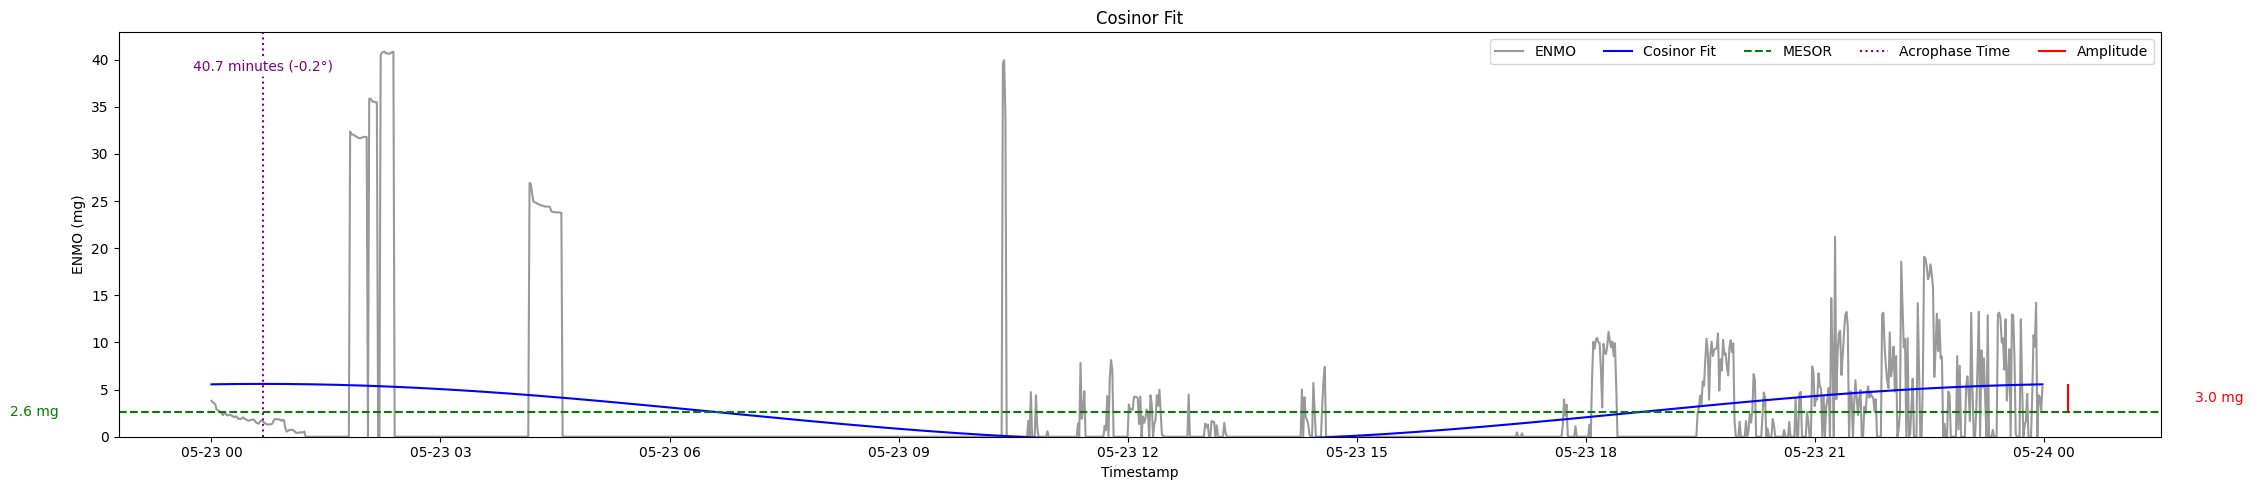

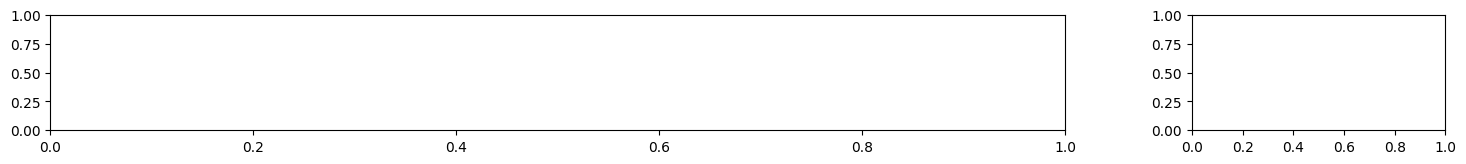

In [12]:
dashboard(features)

In [ ]:
features.get_features()

{'cosinor': {'mesor': np.float64(3.7187859885145063),
  'amplitude': np.float64(3.007805943681516),
  'acrophase': np.float64(-4.302201053712468),
  'acrophase_time': 985.99185197784},
 'nonparam': {'IS': 0.38094916479230456,
  'IV': 1.3407476266229985,
  'M10': [5.311575704995487, 8.892696227137368],
  'M10_start': [Timestamp('2015-12-10 13:49:00'),
   Timestamp('2015-12-11 07:57:00')],
  'L5': [0.0, 0.0],
  'L5_start': [Timestamp('2015-12-10 00:45:00'),
   Timestamp('2015-12-11 00:39:00')],
  'RA': [1.0, 1.0]},
 'physical_activity': {'sedentary': [1369, 1292],
  'light': [39, 79],
  'moderate': [23, 50],
  'vigorous': [9, 19]},
 'sleep': {'TST': [930, 699],
  'WASO': [455, 694],
  'PTA': [64.583, 48.542],
  'NWB': [8, 27],
  'SOL': [53, 47],
  'SRI': -45.58721334259902,
  'SRI_flag': 'negative SRI - very low sleep consistency'}}

In [ ]:
records = [
    {'handler': generic_handler, 
     'age': 40, 
     'gender': 'unknown', 
     'gt_cosinor_age': 22
    }
]

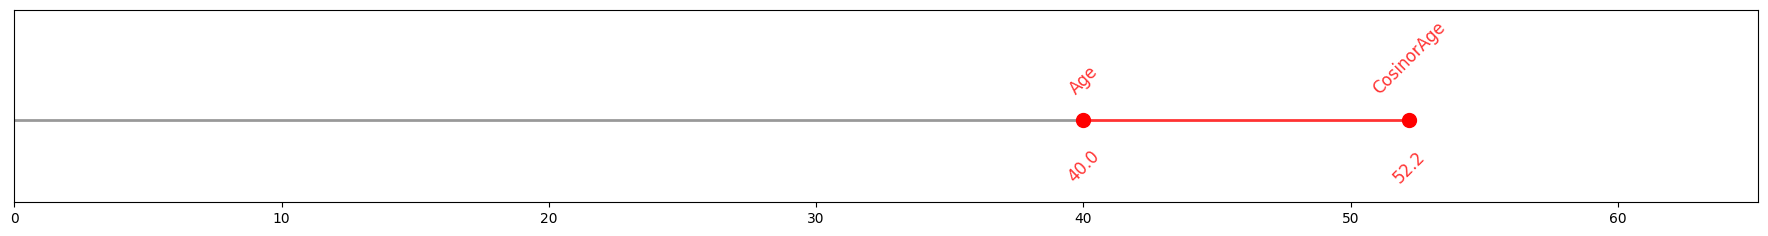

In [ ]:
cosinor_age = CosinorAge(records)
cosinor_age.plot_predictions()

In [ ]:
cosinor_age.get_predictions()

[{'handler': <cosinorage.datahandlers.genericdatahandler.GenericDataHandler at 0x14f5a8430>,
  'age': 40,
  'gender': 'unknown',
  'gt_cosinor_age': 22,
  'mesor': np.float64(3.7187859885145063),
  'amp1': np.float64(3.007805943681516),
  'phi1': np.float64(-4.302201053712468),
  'cosinorage': 52.195998139907786,
  'cosinorage_advance': 12.195998139907786}]